In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import preprocessing



In [ ]:
df = pd.read_csv('Steel_industry_data.csv')
df

# Описательная статистика

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.describe()

In [5]:
C = len(df.columns)
L = len(df.index)
CN = df.count()  #количество
NP = ((L - CN) / L) * 100  #процент пропущенных значений
# MN=df.min() #минимум
# Q1=df.quantile(q=0.25) #первый квартиль
# MA=df.mean() #среднее значение
# ME=df.median() #медиана
# Q3=df.quantile(q=0.75) #третий квартиль
# MX=df.max() #максимум
# ST=df.std() #стандартное отклонение
P = df.nunique()  #мощность
# IQ=Q3-Q1 #интерквартильный размах

In [6]:
from IPython.display import display
import webbrowser

frame = pd.concat([CN, NP, P], axis=1, join="inner")
frame = frame.T
f = pd.DataFrame(frame)
f.index = ['Количество', 'Процент пропусков', 'Мощность']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1 = f.style.apply(lambda x: ["background-color:tomato" if i == 1 else "" for i in x], axis=1,
                   subset=(["Мощность"], slice(None))).apply(
    lambda x: ["background-color:tomato" if i >= 60 else "" for i in x], axis=1,
    subset=(["Процент пропусков"], slice(None))).apply(
    lambda x: ["background-color:steelblue" if (i < 30 and i > 0) else "" for i in x], axis=1,
    subset=(["Процент пропусков"], slice(None))).apply(
    lambda x: ["background-color:limegreen" if i == 0 else "" for i in x], axis=1,
    subset=(["Процент пропусков"], slice(None)))
with open('str.html', 'w') as f:
    f1.to_html(f)

filename = ' str.html'
webbrowser.open_new_tab(filename)

True

*Мощность 2 7 и 3 у трех категориальных признаков (WeekStatus, Day_of_week и Load_type), замаппим на числа*

In [ ]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if column_name == 'WeekStatus' or column_name == 'Day_of_week' or column_name == 'Load_Type':
        df[column_name] = le.fit_transform(df[column_name])
df

In [8]:
df.describe()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,17519.500000,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932,2.994521,0.760959
std,10115.321053,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,2.000021,0.857523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8759.750000,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,1.000000,0.000000
50%,17519.500000,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000,3.000000,0.000000
75%,26279.250000,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,5.000000,2.000000
max,35039.000000,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,6.000000,2.000000


Отсортируемся по времени

In [ ]:
df.sort_values(by='date')

*Избавимся от времени*

In [ ]:
df = df.loc[:, df.columns != 'date']
df

# Тепловая карта

<Axes: >

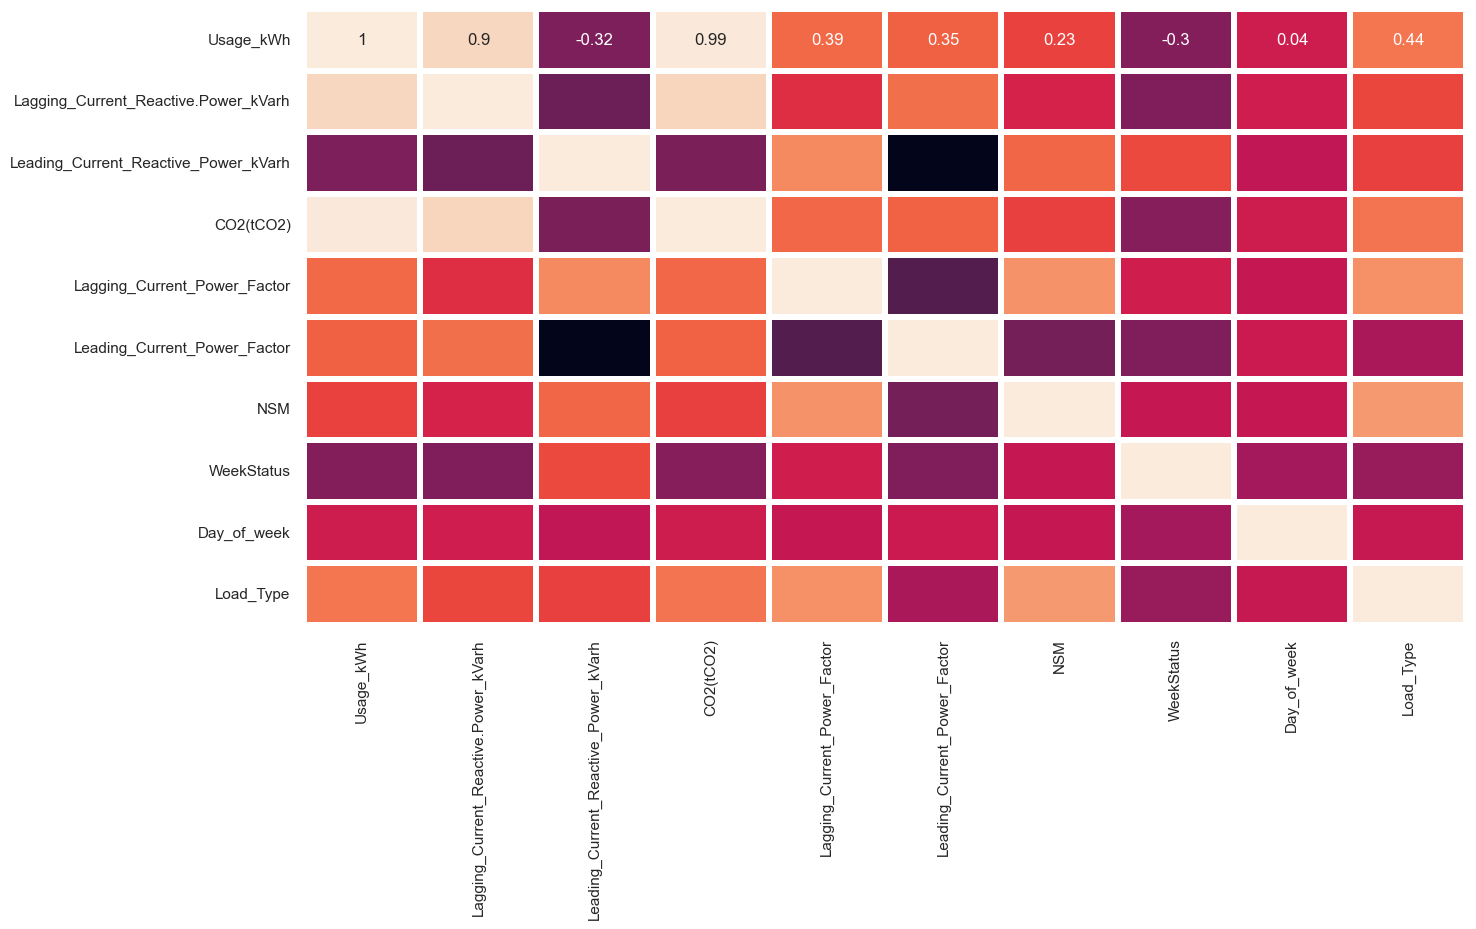

In [20]:
sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  float64
 7   WeekStatus                            35040 non-null  float64
 8   Day_of_week                           35040 non-null  float64
 9   Load_Type                             35040 non-null  float64
dtypes: float64(10)
memory usage: 2.7 MB


In [ ]:
df['NSM'] = df['NSM'].astype('float64')
df['WeekStatus'] = df['WeekStatus'].astype('float64')
df['Day_of_week'] = df['Day_of_week'].astype('float64')
df['Load_Type'] = df['Load_Type'].astype('float64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  float64
 7   WeekStatus                            35040 non-null  float64
 8   Day_of_week                           35040 non-null  float64
 9   Load_Type                             35040 non-null  float64
dtypes: float64(10)
memory usage: 2.7 MB


In [ ]:
df

In [24]:
from PIL import Image

image = Image.open("img.png")
image.show()


In [ ]:
X = df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = df.iloc[:, 0:2]
X

/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-netw

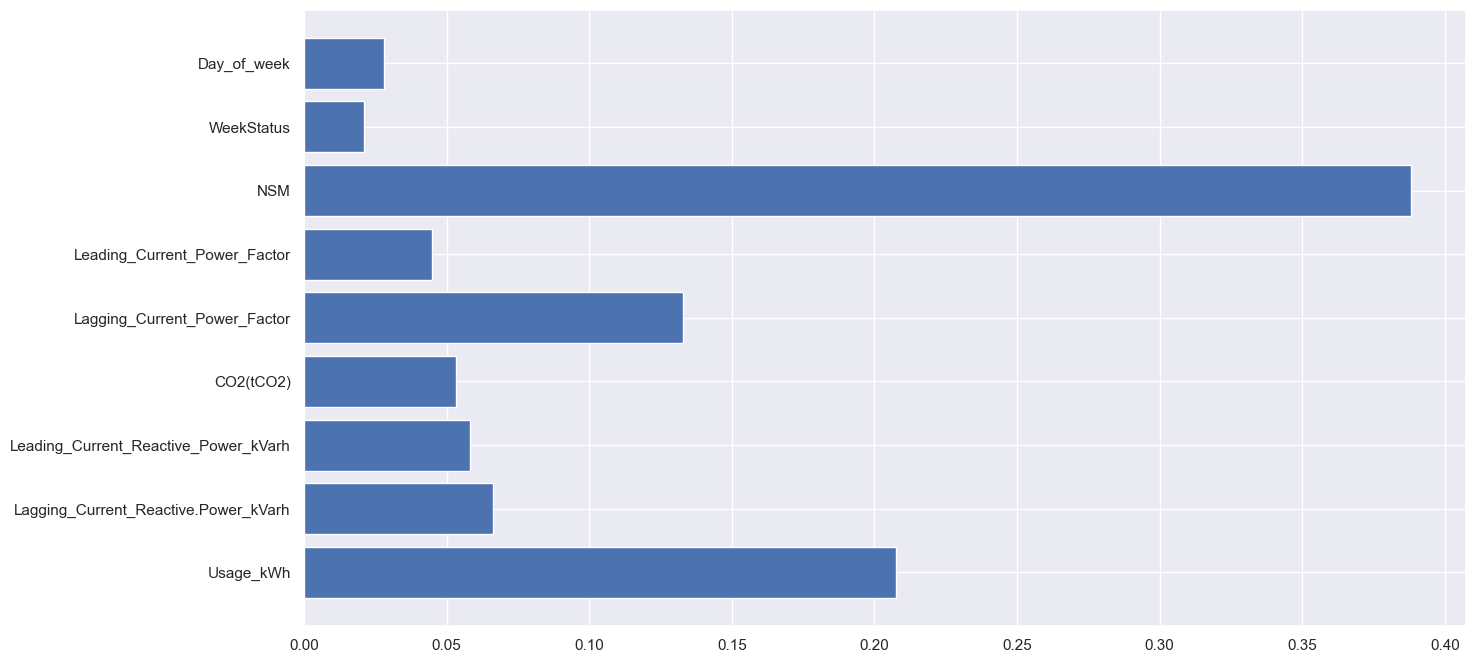

In [30]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Создаем и обучаем модель RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Получаем векторы важности признаков
importance = model.feature_importances_

# Визуализируем векторы важности признаков
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)), X.columns)
plt.show()


По тепловой карте у Usage_kWh и CO2 высокая линейная корреляция (0.99), но важность у CO2 не такая уж и маленькая - выкидываем или нет?

# RMLP Implementation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
y_test

In [11]:
#Отсортируемся по времени
X_train.sort_values(by='date')
X_test.sort_values(by='date')
y_train.sort_values(by='date')
y_test.sort_values(by='date')
#Избавимся от времени
X_train = X_train.loc[:, X_train.columns != 'date']
X_test = X_test.loc[:, X_test.columns != 'date']
y_train = y_train.loc[:, y_train.columns != 'date']
y_test = y_test.loc[:, y_test.columns != 'date']

In [ ]:
X_train

In [13]:
rng = np.random.default_rng(51)


def tanh(x):
    return np.tanh(x)


def dtanh(x):
    return 1 - np.square(tanh(x))


def mse(y_pred, y):
    batch_size = 4
    n = y_pred.shape[0]
    squared_batched = np.array([])
    for i in range(0, n / batch_size, batch_size):
        batch_y_pred = y_pred[i:i + batch_size]
        batch_y = y[i:i + batch_size]
        squared_batched.append(squared_batched, np.sum(np.square(batch_y_pred - batch_y)))
    err = np.mean(squared_batched)
    return err


def dmse(y_pred, y):
    n = y.shape[0]
    return (2 / n) * (y_pred - y)

In [121]:
class RMLP:
    def __init__(self, architecture, learning_rate):
        self.depth = len(architecture) - 1
        self.arch = architecture
        self.lr = learning_rate
        self.W = self._init_weights(architecture)
        self.b = self._init_biases(architecture)
        self.y_pred = np.array([])

        # self.z = [None] * (self.depth + 1)
        # self.y = [None] * (self.depth + 1)
        # functions
        self.activation_fn = tanh
        self.activation_dfn = dtanh
        self.loss_fn = mse
        # self.loss_dfn = dme

    #веса генерятся и для рекуррентных связей. Веса для рекурретных связей - на нечетных позициях
    def _init_weights(self, arch):
        net_in = arch[0]
        net_out = arch[-1]
        limit = np.sqrt(6. / (net_in + net_out))
        results = []
        for i in range(self.depth):
            result = rng.uniform(-limit, limit + 1e-5, size=(arch[i + 1], arch[i]))
            results.append(result)
            result = rng.uniform(-limit, limit + 1e-5, size=(arch[i + 1],))
            results.append(result)

        return results

    def _init_biases(self, arch):
        return [rng.random((arch[i + 1],)) * 2 - 1 for i in range(self.depth)]

    def _compute_loss(self, X, y):
        y_pred = self.predict(X)
        y = np.array(y)
        return self.loss_fn(y_pred, y)

    def _feedforward(self, batch_X):
        self.x_per_layer = np.array([])
        batch_size = batch_X.shape[0]
        # self.y_per_layer = [batch_size] * ([None] * (self.depth + 1))
        # self.y_per_layer = [[[[0]] * i for i in range(self.depth+1)] * j for j in range(batch_size)]
        self.y_per_layer = [([np.zeros(self.arch[i]) for i in range(self.depth + 1)]) for _ in range(batch_size)]
        self.z_per_layer = [([np.zeros(self.arch[i]) for i in range(self.depth + 1)]) for _ in range(batch_size)]
        self.x_per_layer = [
            ([np.zeros(self.arch[(i // 2)] if i % 2 == 0 else self.arch[i // 2 + 1]) for i in range(self.depth * 2)])
            for _ in range(batch_size)]

        memory = [np.zeros(self.arch[i]) for i in range(self.depth + 1)]
        for n in range(batch_size):
            z = [None] * (self.depth + 1)
            out = [None] * (self.depth + 1)  #выходные значения нейронов для каждого слоя
            out[0] = batch_X[n]  #берем sample(вектор фичей) из батча итеративно
            #W[i*2] - веса на связях между i и i+1 слоем слоями
            #W[i*2+1] - вес на рекуррентной связи на 
            x_per_layer = [np.zeros(self.arch[(i // 2)] if i % 2 == 0 else self.arch[i // 2 + 1]) for i in
                           range(self.depth * 2)]
            for i in range(self.depth):
                z[i + 1] = (np.matmul(self.W[i * 2], out[i]) + self.b[i]
                            + np.matmul(self.W[i * 2 + 1], memory[i + 1]))  #выход со слоя с учетом банка задержек
                out[i + 1] = self.activation_fn(z[i + 1])
                x_per_layer[i * 2] = out[i]  # НЕ Z а OUT???
                x_per_layer[i * 2 + 1] = memory[i + 1]
                memory[i + 1] = out[i + 1]  #обновляем значение в банке задержек
            self.y_per_layer[n] = out  #выходные сигналы послойно для каэжого семпла
            self.z_per_layer[n] = z
            self.y_pred = np.append(self.y_pred, out[-1])  #выходной сигнал для выходного слоя (y_pred)
            self.x_per_layer[n] = x_per_layer  #входные сигналы послойно для каждого семпла

    def _backprop(self, batch_d):
        batch_size = batch_d.shape[0]
        #вычисляем градиенты на всех слоях для всех семплов батча:
        grad = [([np.zeros(self.arch[i]) for i in range(self.depth + 1)]) for _ in range(batch_size)]
        for n in range(batch_size - 1, 1, -1):  # n от 3 до 1 (для n0 градиент не считаем)
            grad_per_layer = [np.zeros(self.arch[i]) for i in range(self.depth + 1)]
            y_true = batch_d[n]
            e = y_true - self.y_pred[n]
            if n == batch_size - 1:
                grad_out = self.activation_dfn(self.z_per_layer[n][-1]) * e
            else:
                #взвешенная сумма градиентов этого слоя предыдущего семпла с весом + взвеш сумма градиентов предыдущего слоя на веса - рецептивное поле нейрона (те, кто втыкаются в нейрон)
                sum_weight_gr_next = np.matmul(self.W[-1], grad[n + 1][-1]) + np.matmul(self.W[-2], grad[n + 1][-2])
                grad_out = self.activation_dfn(self.z_per_layer[n][-1]) * (
                        e + sum_weight_gr_next
                )
            grad_per_layer[self.depth] = grad_out
            for i in range(self.depth - 1, 0, -1):
                #взвешенная сумма предыдущ локальных градиентов (справа) на веса справа(!!!) - рецептивное поле нейрона (так как backprop, поэтому справа)
                sum_gr_weight = np.matmul(grad_per_layer[i + 1], self.W[i * 2])
                grad_hidden = sum_gr_weight * self.activation_dfn(self.z_per_layer[n][i])
                grad_per_layer[i] = grad_hidden
            grad[n] = grad_per_layer

        grad.reverse()

        #TODO
        #Вычислим дельты для обновления весов
        for i in range(self.depth * 2):
            sum_gr_x_per_sample = np.array([])
            for n in range(1, batch_size, 1):
                sum_gr_x_per_sample = np.matmul(grad[n][i / 2], self.x_per_layer[n - 1][
                    i])  #для апдейта рекуррентных весов те  же градиенты (так как тот же нейрон), но входная связь другая
            sum_gr_x_per_sample = sum_gr_x_per_sample + sum_gr_x_per_sample
            delta_W = self.lr * sum_gr_x_per_sample
            self.W[i] = self.W[i] + delta_W

    def train(self, X, y, epochs=1):
        #даем на обучение по одному примерчику
        n = y.shape[0]
        epoch_losses = np.array([])
        batch_size = 4

        for i in range(epochs):
            #даем на обучение по одному примерчику
            for j in range(0, int(n / batch_size), batch_size):
                batch_X = X.iloc[j:j + batch_size].values
                batch_Y = y.iloc[j:j + batch_size].values
                self._feedforward(batch_X)
                self._backprop(batch_Y)
            epoch_losses = np.append(epoch_losses, self._compute_loss(X, y))
        return epoch_losses

    def predict(self, X):
        batch_size = 4
        n = y.shape[0]
        self.y_pred = np.array([])
        for k in range(0, n / batch_size, batch_size):
            self._feedforward(X.iloc[k:k + batch_size].values)
        return self.y_pred


In [122]:
net_arch = (9, 5, 5, 1)
nn = RMLP(net_arch, 0.001)
# nn._init_weights(net_arch)
epoch_losses = nn.train(X_train, pd.DataFrame(y_train), 3)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

KeyboardInterrupt: 